## 1. Importação de bibliotecas

---



In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Carregamento dos dados

---



In [25]:
url = 'https://github.com/danoliveiraed/superstore-analytics/raw/refs/heads/main/data/Sample%20-%20Superstore.csv'

In [26]:
dado = pd.read_csv(url, sep=',', encoding='ISO-8859-1')

In [27]:
dado.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


## 3. Limpeza e tratamento
* Conversão de colunas de data.

* Padronização de categorias.

* Remoção de dados nulos ou inconsistentes.

---



In [28]:
dado = dado.drop(columns=['Row ID'])

In [29]:
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

Conversão de colunas de data.

In [30]:
dado['Order Date'] = pd.to_datetime(dado['Order Date'])
dado['Ship Date'] = pd.to_datetime(dado['Ship Date'])
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

Verificar valores nulos

In [31]:
dado.isnull().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


Padronização de categorias

In [32]:
categoricas = ['Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Ship Mode']
for col in categoricas:
    dado[col] = dado[col].astype('category')

Remoção de dados nulos ou inconsistentes.

In [33]:
dado.duplicated().any()

np.True_

In [34]:
dado.duplicated().sum()

np.int64(1)

In [35]:
dado[dado.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [36]:
dado.drop_duplicates(inplace=True)
dado[dado.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


## 4. Criação de análises

* Receita e lucro por categoria, região, estado, mês.

* Top 10 produtos por lucro.

* Tabelas agregadas que serão exportadas para o Power BI.


---



In [37]:
dado['Tempo Entrega'] = (dado['Ship Date'] - dado['Order Date']).dt.days
dado.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Tempo Entrega
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,4


In [38]:
dado['Mes'] = dado['Order Date'].dt.month
dado['Ano'] = dado['Order Date'].dt.year
dado.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Tempo Entrega,Mes,Ano
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3,11,2016
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3,11,2016
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,4,6,2016


Incluindo coluna com o lucro por produto

In [39]:
dado['Lucro Produto'] = (dado['Profit'] / dado['Quantity'])
dado.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Tempo Entrega,Mes,Ano,Lucro Produto
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3,11,2016,20.9568
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3,11,2016,73.1940
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,4,6,2016,3.4357


Incluindo coluna AnoMes

In [40]:
dado['AnoMes'] = dado['Order Date'].dt.to_period('M').astype(str)
dado.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Tempo Entrega,Mes,Ano,Lucro Produto,AnoMes
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3,11,2016,20.9568,2016-11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3,11,2016,73.1940,2016-11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,4,6,2016,3.4357,2016-06


Receita por Categoria

In [41]:
categoria_agg = dado.groupby('Category', observed=True)[['Sales', 'Profit']].sum().reset_index().sort_values(by='Sales', ascending=False)
categoria_agg.head(3)

,Category,Sales,Profit
2,Technology,836154.0330,145454.9481
0,Furniture,741718.4233,18463.3316
1,Office Supplies,719047.0320,122490.8008


Receita e Lucro por Região

In [42]:
regiao_agg = dado.groupby('Region', observed=True)[['Sales', 'Profit']].sum().reset_index().sort_values(by='Sales', ascending=False)
regiao_agg.head(3)

,Region,Sales,Profit
3,West,725457.8245,108418.4489
1,East,678499.8680,91534.8388
0,Central,501239.8908,39706.3625


Receita e Lucro por Estado

In [43]:
mes_agg = dado.groupby('AnoMes', observed=True)[['Sales', 'Profit']].sum().reset_index().sort_values(by='AnoMes')
mes_agg.head(3)

,AnoMes,Sales,Profit
0,2014-01,14236.895,2450.1907
1,2014-02,4519.892,862.3084
2,2014-03,55691.009,498.7299


In [44]:
estado_agg = dado.groupby('State', observed=True)[['Sales', 'Profit']].sum().reset_index().sort_values(by='Sales', ascending=False)
estado_agg.head(3)

,State,Sales,Profit
3,California,457687.6315,76381.3871
30,New York,310876.2710,74038.5486
41,Texas,170188.0458,-25729.3563


In [47]:
top_lucro_estado = estado_agg.sort_values(by='Profit', ascending=False).head(10)
top_lucro_estado.head(3)

,State,Sales,Profit
3,California,457687.63,76381.39
30,New York,310876.27,74038.55
45,Washington,138641.27,33402.65


## 5. Visualizações com Seaborn e Matplotlib

---



Receita por Categoria

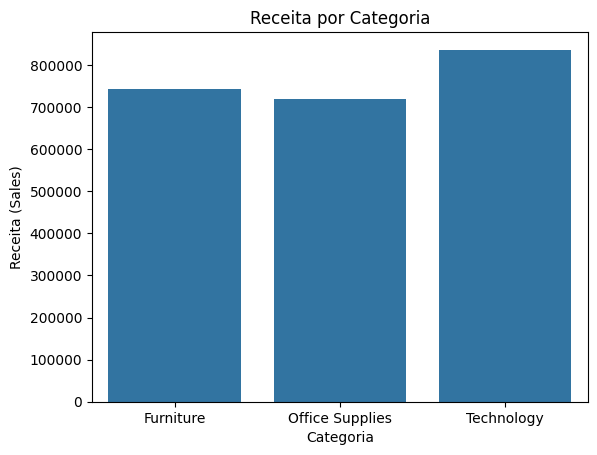

In [45]:
sns.barplot(data=categoria_agg, x='Category', y='Sales')
plt.title('Receita por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Receita (Sales)')
plt.xticks(rotation=0)
plt.show()

## 6. Exportação para CSV

---



Arredondando campos de valor para 2 casas decimais

In [48]:
categoria_agg[['Sales', 'Profit']] = categoria_agg[['Sales', 'Profit']].round(2)
regiao_agg[['Sales', 'Profit']] = regiao_agg[['Sales', 'Profit']].round(2)
estado_agg[['Sales', 'Profit']] = estado_agg[['Sales', 'Profit']].round(2)
mes_agg[['Sales', 'Profit']] = mes_agg[['Sales', 'Profit']].round(2)
top_lucro_estado[['Profit']] = top_lucro_estado[['Profit']].round(2)

Exportando para CSV

In [49]:
categoria_agg.to_csv('vendas_lucro_categoria.csv', index=False)
regiao_agg.to_csv('vendas_lucro_regiao.csv', index=False)
estado_agg.to_csv('vendas_lucro_estado.csv', index=False)
mes_agg.to_csv('vendas_lucro_mensal.csv', index=False)
top_lucro_estado.to_csv('top10_lucro_estado.csv', index=False)